# Unified Mentor Project 2 - Netflix Data : Cleaning, Analysis and Visualization
Hemamalya K P

This project focuses on importing, cleaning, analyzing, and visualizing data from a Netflix dataset. We will utilize Python libraries such as Pandas, Matplotlib, and Seaborn throughout the process. The objective is to explore the dataset, extract valuable insights, and set the stage for possible machine learning applications.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
 # Loading the dataset
data = pd.read_csv('C:/Users/HemaMalya/Downloads/Unified Mentor/netflix1.csv')

In [3]:
 # Displaying the first 5 rows of the dataset
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [4]:
data.info

<bound method DataFrame.info of      show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

            country  date_added  release_year rating   

In [5]:
# No. of Rows and Columns
data.shape

(8790, 10)

# Data Cleaning

In [6]:
# Check for missing values
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


No missing values 

In [7]:
# Finding duplicates
data[data.duplicated()]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in


No duplicates found

In [8]:
 # Dropping the duplicates if any
data.drop_duplicates(inplace=True)

In [9]:
# Drop rows with missing critical information
data.dropna(subset=['director','country'], inplace=True)

# Exploratory Data Analysis

# 1. Content Type Distribution (Movies vs. TV Shows)

In [10]:
 # Count of the number of Movies and TV Shows
freq = data['type'].value_counts()

In [11]:
freq

Movie      6126
TV Show    2664
Name: type, dtype: int64

Text(0.5, 1.0, 'Content Distribution')

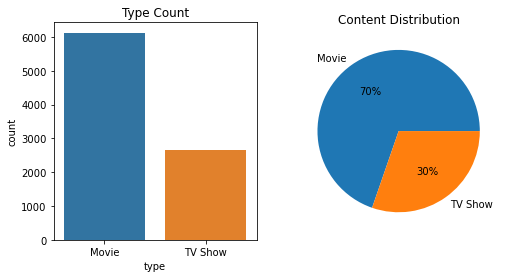

In [12]:
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(x='type', data=data, ax=axes[0])
axes[0].set_title('Type Count')
axes[1].pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
axes[1].set_title('Content Distribution')

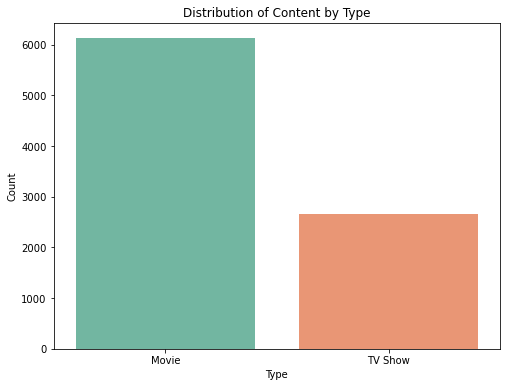

In [13]:
# Plot the distribution of content by type
plt.figure(figsize=(8, 6))
sns.barplot(x=freq.index, y=freq.values,  palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Visual representation of rating frequency of movies and TV Shows on Netflix.

In [14]:
 data['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [15]:
ratings = data['rating'].value_counts().reset_index()
ratings.columns = ['rating', 'Count'] 

In [16]:
ratings = ratings.sort_values(by='Count', ascending=False)

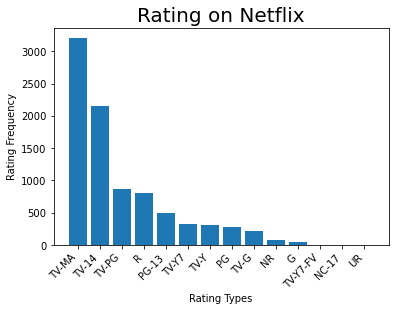

In [17]:
plt.bar(ratings['rating'], ratings['Count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.title('Rating on Netflix', fontsize=20) 
plt.show()

([<matplotlib.patches.Wedge at 0x23187b9b910>,
 [Text(0.4054852705106682, 1.0225368919500608, 'TV-MA'),
  Text(-1.0987315304906282, -0.05281121003841787, 'TV-14'),
  Text(-0.42746989938281926, -1.0135430356534658, 'TV-PG'),
  Text(0.23889436415895451, -1.0737455391167354, 'R'),
  Text(0.707658865316201, -0.8421513702057292, 'PG-13'),
  Text(0.9287256541105534, -0.5894647227756085, 'TV-Y7'),
  Text(1.0414859630921145, -0.3539872719210267, 'TV-Y'),
  Text(1.093726161648645, -0.11731616821786457, 'PG')],
 [Text(0.22117378391490988, 0.557747395609124, '38%'),
  Text(-0.5993081075403426, -0.028806114566409743, '26%'),
  Text(-0.23316539966335592, -0.5528416558109812, '10%'),
  Text(0.13030601681397516, -0.5856793849727647, '9%'),
  Text(0.3859957447179278, -0.45935529283948856, '6%'),
  Text(0.5065776295148472, -0.3215262124230591, '4%'),
  Text(0.5680832525956987, -0.19308396650237816, '4%'),
  Text(0.5965779063538063, -0.06399063720974431, '3%')])

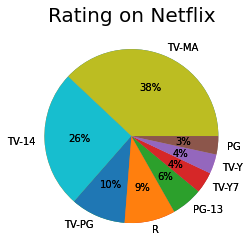

In [18]:
plt.pie(ratings['Count'][:8], labels=ratings['rating'][:8], autopct='%.0f%%')
plt.title('Rating on Netflix', fontsize=20)
top_ratings = ratings.head(8)  # Safely get the top 8 rows
plt.pie(top_ratings['Count'], labels=top_ratings['rating'], autopct='%.0f%%')


# 2. Most Common Genres

In [19]:
# Spliting the 'listed_in' column and count genres
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)


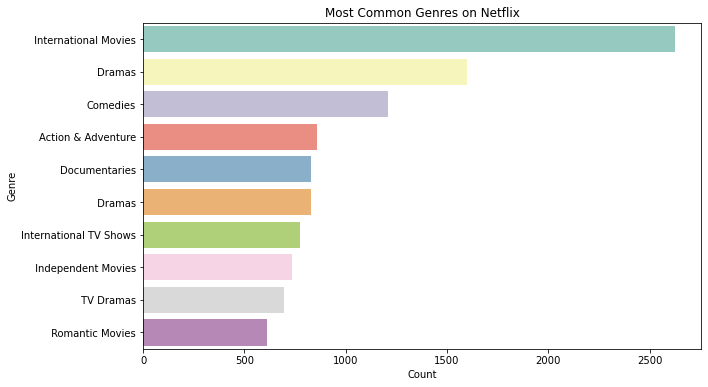

In [20]:
# Ploting the most common genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values,  y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# 3. Content Added Over Time

In [21]:
# Ensure 'date_added' is in datetime format
data['date_added'] = pd.to_datetime(data['date_added'])

# Extract year and month from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

# Assuming genre_counts is a Series, assign the index to y
y = genre_counts.index


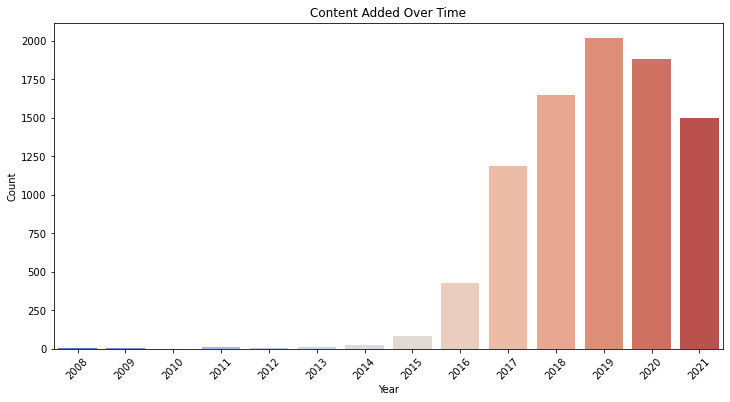

In [22]:
# Plot content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Top 10 Directors with the Most Titles

In [23]:
# Count titles by director
top_directors = data['director'].value_counts().head(10)

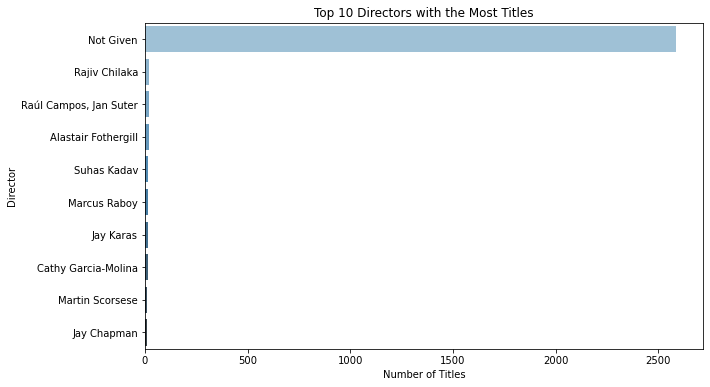

In [24]:
# Plot top directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# 5. Top 10 countries with most content on Netflix

In [25]:
 data['country'].value_counts()

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Greece               1
Guatemala            1
Cameroon             1
Cyprus               1
Zimbabwe             1
Name: country, Length: 86, dtype: int64

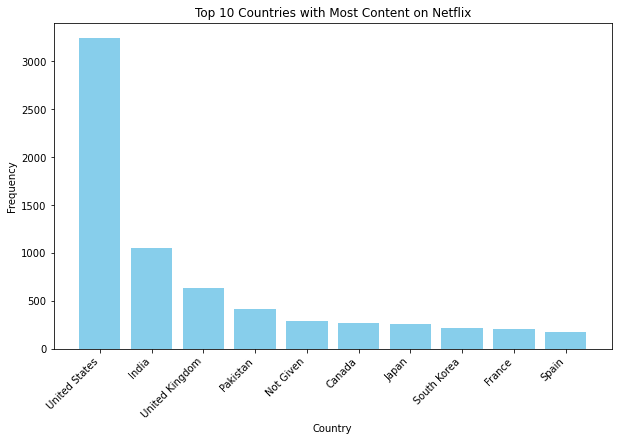

In [26]:

# Processing the data
top_ten_countries = data['country'].value_counts().reset_index()
top_ten_countries.columns = ['country', 'count']  # Rename columns
top_ten_countries = top_ten_countries[:10]  # Top 10 countries

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Top 10 Countries with Most Content on Netflix")  # Use plt.title
plt.show()


In [27]:
data['year']=data['date_added'].dt.year
data['month']=data['date_added'].dt.month
data['day']=data['date_added'].dt.day

# 6. Monthly releases of Movies and TV shows on Netflix

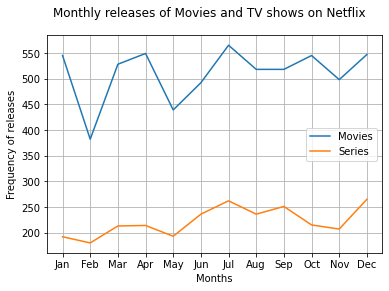

In [28]:
monthly_movie_release=data[data['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release=data[data['type']=='TV Show']['month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values,label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()


# 7. Yearly releases of Movies and TV Shows on Netflix

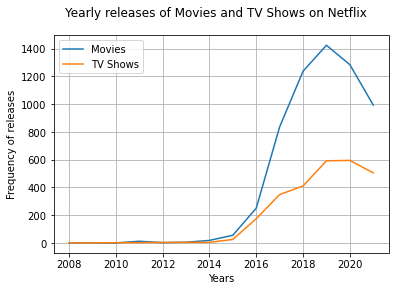

In [29]:
yearly_movie_releases=data[data['type']=='Movie']['year'].value_counts().sort_index()
yearly_series_releases=data[data['type']=='TV Show']['year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

# 8.Top 10 popular movie genres

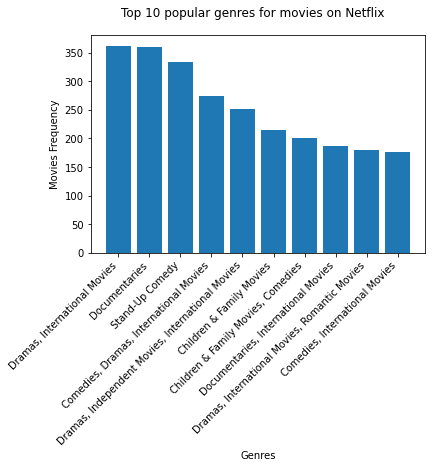

In [30]:
popular_movie_genre=data[data['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)[:10]
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()


# 9. Top 10 TV Shows genres

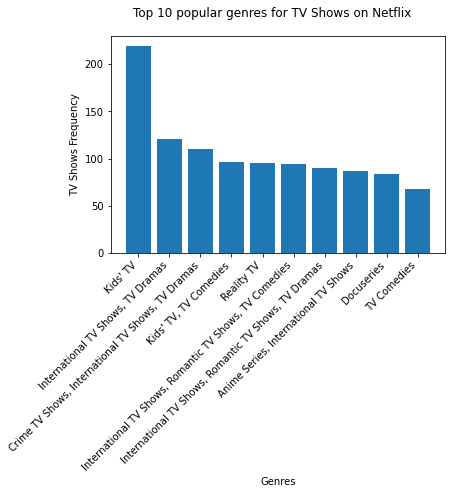

In [31]:
plt.bar(popular_series_genre.index, popular_series_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()

# 10.Top 15 directors across Netflix with hoigh frequency of movies and shows.


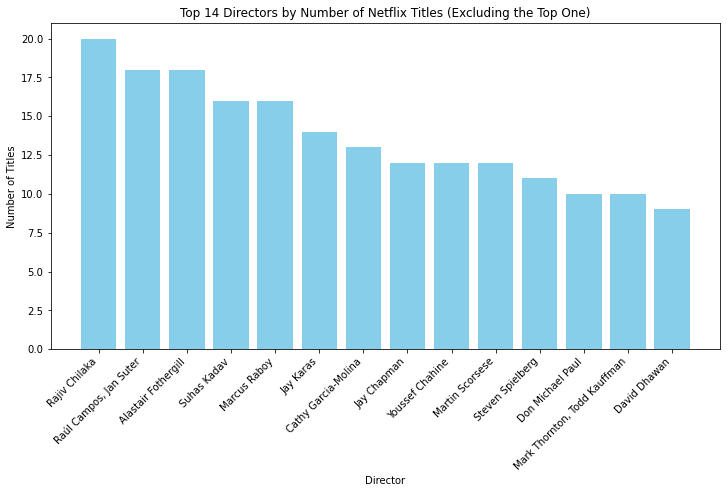

In [32]:
# Process the data
directors = data['director'].value_counts().reset_index()
directors.columns = ['director', 'count']  # Rename columns
directors = directors.sort_values(by='count', ascending=False)[1:15]  # Exclude the top director

# Plotting
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.bar(directors['director'], directors['count'], color='skyblue')  # Bar plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel("Director")
plt.ylabel("Number of Titles")
plt.title("Top 14 Directors by Number of Netflix Titles (Excluding the Top One)")
plt.show()

# 11. Word Cloud of Movie Titles

In [33]:
 # Generate word cloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud= WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

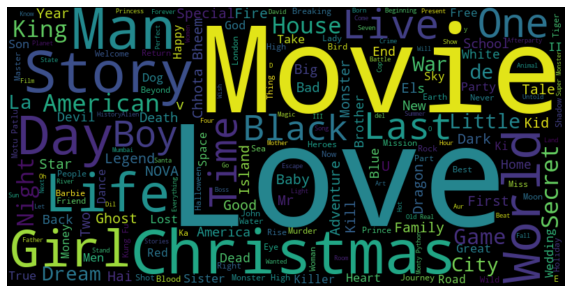

In [34]:
 # Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#  Conclusion and Insights

1. Processed the dataset by addressing missing values, eliminating duplicate entries, and standardizing data types.
2. Conducted exploratory analysis using visualizations like bar charts and word clouds to uncover insights.
3. Investigated content patterns over the years, pinpointed trending genres, and showcased leading directors.